<a href="https://colab.research.google.com/github/rohandaniel/Image-Classification-using-CNN/blob/main/Image%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

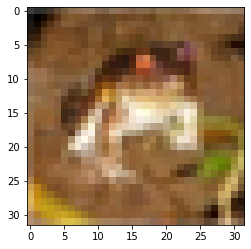

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

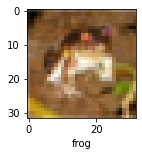

In [12]:
plot_sample(X_train,y_train,0)

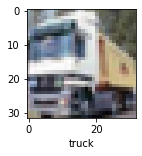

In [13]:
plot_sample(X_train,y_train,1)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(10,activation="softmax")

])
model.compile(optimizer="SGD",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8024 - accuracy: 0.3617
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6138 - accuracy: 0.4320
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5307 - accuracy: 0.4614
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4687 - accuracy: 0.4824
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4183 - accuracy: 0.5002
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3747 - accuracy: 0.5174
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3364 - accuracy: 0.5315
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2988 - accuracy: 0.5431
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2677 - accuracy: 0.5543
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.23

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3720 - accuracy: 0.5117


[1.3720276355743408, 0.5116999745368958]

In [17]:
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(x) for x in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.57      0.58      1000
           1       0.80      0.44      0.57      1000
           2       0.38      0.51      0.44      1000
           3       0.45      0.18      0.25      1000
           4       0.55      0.33      0.41      1000
           5       0.42      0.49      0.45      1000
           6       0.49      0.72      0.58      1000
           7       0.65      0.53      0.58      1000
           8       0.45      0.80      0.58      1000
           9       0.61      0.55      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.54      0.51      0.50     10000



Text(69.0, 0.5, 'Truth')

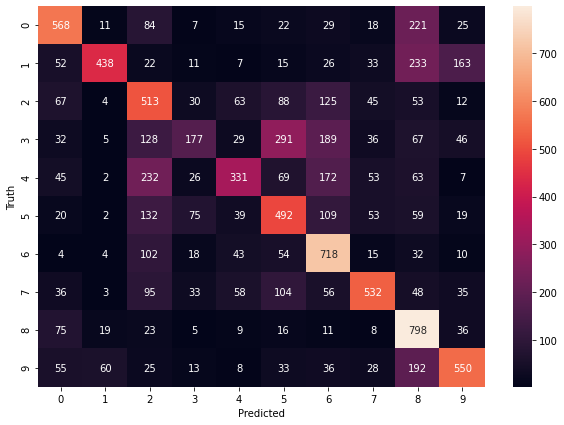

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4526 - accuracy: 0.4764
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0949 - accuracy: 0.6167
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9635 - accuracy: 0.6640
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8730 - accuracy: 0.6952
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8113 - accuracy: 0.7177
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7522 - accuracy: 0.7387
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7054 - accuracy: 0.7541
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6638 - accuracy: 0.7685
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6227 - accuracy: 0.7800
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.587

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9082 - accuracy: 0.7092


[0.9081832766532898, 0.7092000246047974]

In [27]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[2.2643917e-04, 1.7612913e-06, 4.3054326e-03, 7.7670223e-01,
        7.2152086e-04, 9.6271619e-02, 1.2164182e-03, 1.4957511e-04,
        1.2039251e-01, 1.2404110e-05],
       [5.7241386e-03, 4.0853640e-01, 2.2037568e-08, 9.3597649e-08,
        4.5212873e-09, 1.3789126e-08, 7.4458406e-10, 2.6153182e-09,
        5.8387297e-01, 1.8663845e-03],
       [2.1014014e-02, 4.8174873e-01, 1.6693027e-04, 8.7017886e-04,
        2.4200628e-04, 3.5969858e-04, 4.5386158e-05, 6.5818586e-04,
        3.3298633e-01, 1.6190849e-01],
       [9.7232157e-01, 2.0068719e-05, 3.6503340e-03, 2.0505652e-04,
        9.1782160e-04, 1.7533401e-05, 2.7276074e-05, 9.6500310e-07,
        2.2836624e-02, 2.7624967e-06],
       [2.5396147e-07, 2.7231026e-05, 7.9976469e-03, 1.8665871e-03,
        1.7357586e-01, 3.2873967e-04, 8.1619698e-01, 5.1512546e-07,
        5.4239690e-06, 8.4164088e-07]], dtype=float32)

In [28]:
y_classes = [np.argmax(x) for x in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [29]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

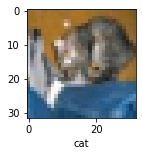

In [30]:
plot_sample(X_test, y_test,0)

In [31]:
classes[y_classes[0]]

'cat'

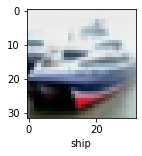

In [32]:
plot_sample(X_test, y_test,1)

In [33]:
classes[y_classes[1]]

'ship'

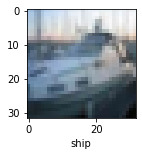

In [34]:
plot_sample(X_test, y_test,2)

In [35]:
classes[y_classes[2]]

'automobile'

In [36]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.81      0.85      0.83      1000
           2       0.62      0.56      0.59      1000
           3       0.60      0.43      0.50      1000
           4       0.61      0.71      0.66      1000
           5       0.64      0.60      0.62      1000
           6       0.70      0.81      0.75      1000
           7       0.75      0.77      0.76      1000
           8       0.78      0.84      0.81      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



Text(69.0, 0.5, 'Truth')

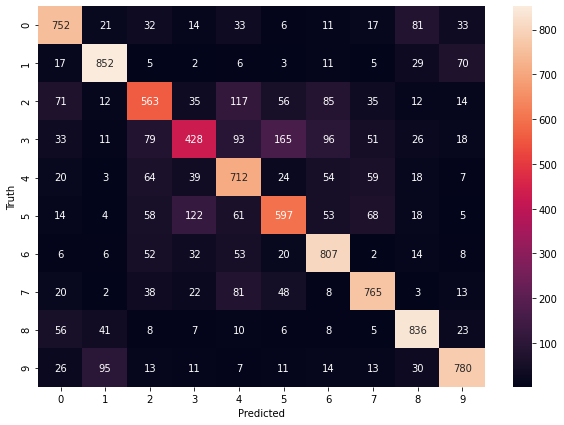

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_classes),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")